<a href="https://colab.research.google.com/github/nirjana/Mushroom-Edibility-Classification/blob/master/Mushroom_Edibility_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


print(tf.__version__)

2.11.0


# **Some Necessary EDA**

In [ ]:
df = pd.read_csv("/content/sample_data/mushroom.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [ ]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [ ]:
df['class'].value_counts()

b'e'    4208
b'p'    3916
Name: class, dtype: int64

In [ ]:
df.shape

(8124, 23)

In [ ]:
column_names = df.columns.tolist()
column_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises%3F',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'class']

In [ ]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [ ]:
df['cap-shape'].describe()

count     8124
unique       6
top       b'x'
freq      3656
Name: cap-shape, dtype: object

In [ ]:
object_nunique = list(map(lambda col: df[col].nunique(), column_names))
d = dict(zip(column_names, object_nunique))
d

{'cap-shape': 6,
 'cap-surface': 4,
 'cap-color': 10,
 'bruises%3F': 2,
 'odor': 9,
 'gill-attachment': 2,
 'gill-spacing': 2,
 'gill-size': 2,
 'gill-color': 12,
 'stalk-shape': 2,
 'stalk-root': 5,
 'stalk-surface-above-ring': 4,
 'stalk-surface-below-ring': 4,
 'stalk-color-above-ring': 9,
 'stalk-color-below-ring': 9,
 'veil-type': 1,
 'veil-color': 4,
 'ring-number': 3,
 'ring-type': 5,
 'spore-print-color': 9,
 'population': 6,
 'habitat': 7,
 'class': 2}

In [ ]:
d.items()

dict_items([('cap-shape', 6), ('cap-surface', 4), ('cap-color', 10), ('bruises%3F', 2), ('odor', 9), ('gill-attachment', 2), ('gill-spacing', 2), ('gill-size', 2), ('gill-color', 12), ('stalk-shape', 2), ('stalk-root', 5), ('stalk-surface-above-ring', 4), ('stalk-surface-below-ring', 4), ('stalk-color-above-ring', 9), ('stalk-color-below-ring', 9), ('veil-type', 1), ('veil-color', 4), ('ring-number', 3), ('ring-type', 5), ('spore-print-color', 9), ('population', 6), ('habitat', 7), ('class', 2)])

In [ ]:
sorted(d.items(), key=lambda x: x[1])


[('veil-type', 1),
 ('bruises%3F', 2),
 ('gill-attachment', 2),
 ('gill-spacing', 2),
 ('gill-size', 2),
 ('stalk-shape', 2),
 ('class', 2),
 ('ring-number', 3),
 ('cap-surface', 4),
 ('stalk-surface-above-ring', 4),
 ('stalk-surface-below-ring', 4),
 ('veil-color', 4),
 ('stalk-root', 5),
 ('ring-type', 5),
 ('cap-shape', 6),
 ('population', 6),
 ('habitat', 7),
 ('odor', 9),
 ('stalk-color-above-ring', 9),
 ('stalk-color-below-ring', 9),
 ('spore-print-color', 9),
 ('cap-color', 10),
 ('gill-color', 12)]

In [ ]:
df.drop("veil-type", axis=1, inplace=True)

# **Spliting Data Into Train and Test**

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
len(df_train),len(df_test)

(6499, 1625)

In [ ]:
df_test

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
1392,b'f',b's',b'w',b'f',b'n',b'f',b'w',b'b',b'h',b't',...,b'f',b'w',b'w',b'w',b'o',b'e',b'k',b'a',b'g',b'e'
4051,b'x',b'f',b'p',b'f',b'c',b'f',b'w',b'n',b'u',b'e',...,b's',b'w',b'w',b'w',b'o',b'p',b'n',b'v',b'd',b'p'
3725,b'x',b's',b'w',b'f',b'c',b'f',b'w',b'n',b'g',b'e',...,b's',b'w',b'w',b'w',b'o',b'p',b'n',b'v',b'd',b'p'
7177,b'k',b's',b'n',b'f',b'f',b'f',b'c',b'n',b'b',b't',...,b'k',b'p',b'w',b'w',b'o',b'e',b'w',b'v',b'l',b'p'
103,b'x',b'y',b'y',b't',b'a',b'f',b'c',b'b',b'n',b'e',...,b'y',b'w',b'w',b'w',b'o',b'p',b'k',b'y',b'p',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,b'f',b'y',b'g',b'f',b'f',b'f',b'c',b'b',b'g',b'e',...,b'k',b'p',b'b',b'w',b'o',b'l',b'h',b'v',b'g',b'p'
3695,b'f',b'y',b'n',b't',b'n',b'f',b'c',b'b',b'w',b't',...,b's',b'g',b'w',b'w',b'o',b'p',b'n',b'y',b'd',b'e'
6878,b'x',b's',b'n',b'f',b'f',b'f',b'c',b'n',b'b',b't',...,b'k',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'd',b'p'
94,b'x',b's',b'n',b'f',b'n',b'f',b'w',b'b',b'n',b't',...,b's',b'w',b'w',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [ ]:
df_train

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
1610,b'x',b'f',b'n',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b's',b'w',b'w',b'w',b'o',b'e',b'k',b'a',b'g',b'e'
1939,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b's',b'w',b'w',b'w',b'o',b'e',b'k',b's',b'g',b'e'
5573,b'x',b'y',b'e',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'k',b'p',b'p',b'w',b'o',b'e',b'w',b'v',b'd',b'p'
7076,b'x',b's',b'e',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b's',b'p',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'
2000,b'x',b'f',b'n',b't',b'n',b'f',b'c',b'b',b'w',b't',...,b's',b'g',b'g',b'w',b'o',b'p',b'n',b'v',b'd',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,b'k',b'y',b'e',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b's',b'w',b'w',b'w',b'o',b'e',b'w',b'v',b'd',b'p'
5192,b'x',b'y',b'n',b'f',b's',b'f',b'c',b'n',b'b',b't',...,b's',b'w',b'w',b'w',b'o',b'e',b'w',b'v',b'd',b'p'
3980,b'f',b'y',b'g',b'f',b'f',b'f',b'c',b'b',b'p',b'e',...,b'k',b'b',b'n',b'w',b'o',b'l',b'h',b'v',b'g',b'p'
235,b'x',b'f',b'w',b't',b'l',b'f',b'w',b'n',b'w',b't',...,b's',b'w',b'w',b'w',b'o',b'p',b'n',b'v',b'd',b'e'


** encoded class 'edible' to 0, and 'poisonous' to 1.**

In [ ]:
y_train = df_train.pop("class")
y_test = df_test.pop("class")
y_train = y_train.replace({"b'p'": 0, "b'e'": 1})
y_test = y_test.replace({"b'p'": 0, "b'e'": 1})
X_train = df_train
X_test = df_test


In [ ]:
y_train

1610    1
1939    1
5573    0
7076    0
2000    1
       ..
7935    0
5192    0
3980    0
235     1
5157    0
Name: class, Length: 6499, dtype: int64

# **Encoding the Dataset's**

In [ ]:
# Get list of columns - In this dataset, all columns are categorical so no extra steps needed
cols = X_train.columns.tolist()

# Applying one-hot encoding to training and testing sets
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_X_train = pd.DataFrame(encoder.fit_transform(X_train[cols]))
encoded_X_test = pd.DataFrame(encoder.transform(X_test[cols]))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Encoded Data**

In [ ]:
encoded_X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
count,6499.00000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,...,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,0.05447,0.000308,0.389906,0.105401,0.003077,0.446838,0.285121,0.000154,0.312510,0.402216,...,0.152331,0.500231,0.208647,0.388983,0.264964,0.101862,0.036006,0.140022,0.044622,0.023542
std,0.22696,0.017541,0.487766,0.307093,0.055393,0.497204,0.451507,0.012404,0.463552,0.490383,...,0.359369,0.500038,0.406373,0.487557,0.441348,0.302490,0.186318,0.347036,0.206489,0.151629
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
encoded_X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,...,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,0.060308,0.001231,0.380308,0.088000,0.007385,0.462769,0.287385,0.001846,0.323077,0.387692,...,0.158769,0.485538,0.219077,0.381538,0.262154,0.104615,0.035692,0.144000,0.048000,0.024000
std,0.238129,0.035072,0.485612,0.283382,0.085642,0.498765,0.452682,0.042940,0.467796,0.487374,...,0.365573,0.499945,0.413748,0.485914,0.439941,0.306151,0.185579,0.351198,0.213832,0.153096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
encoded_X_train.shape

(6499, 116)

In [ ]:
encoded_X_test.shape

(1625, 116)

In [ ]:
encoded_X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Data Visualization**

(array([3656.,    0.,  452.,    0.,   32.,    0., 3152.,    0.,  828.,
           4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

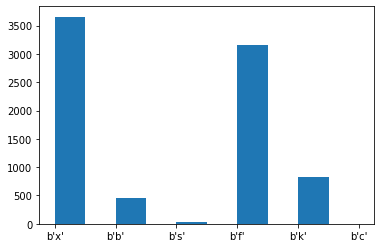

In [ ]:
plt.hist(df.iloc[:,0])

(array([2556.,    0.,    0., 3244.,    0.,    0., 2320.,    0.,    0.,
           4.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

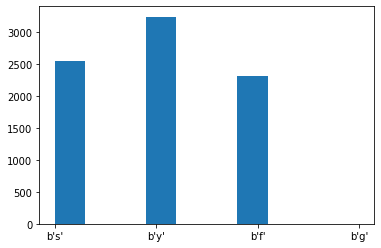

In [ ]:
plt.hist(df.iloc[:,1])

(array([2512.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5612.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

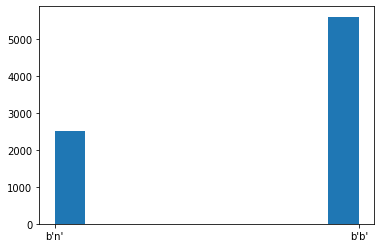

In [ ]:
plt.hist(df.iloc[:,3])

# **Training Multiple Models**

In [ ]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=1)

In [ ]:
# encoded_X_train = feature , y_train= class

In [ ]:
xgb.fit(encoded_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
y_pred = xgb.predict(encoded_X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9969230769230769


In [ ]:
df = pd.read_csv("/content/sample_data/mushroom.csv")
features = ["cap-shape", "cap-surface", "cap-color", "gill-size", "stalk-shape", "stalk-root"]
target = ["class"]
df = df.loc[:, features + target]
df.head()

,cap-shape,cap-surface,cap-color,gill-size,stalk-shape,stalk-root,class
0,b'x',b's',b'n',b'n',b'e',b'e',b'p'
1,b'x',b's',b'y',b'b',b'e',b'c',b'e'
2,b'b',b's',b'w',b'b',b'e',b'c',b'e'
3,b'x',b'y',b'w',b'n',b'e',b'e',b'p'
4,b'x',b's',b'g',b'b',b't',b'e',b'e'


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
y_train = df_train.pop("class")
y_test = df_test.pop("class")
y_train = y_train.replace({"b'p'": 0, "b'e'": 1})
y_test = y_test.replace({"b'p'": 0, "b'e'": 1})
X_train = df_train
X_test = df_test

In [ ]:
cols = X_train.columns.tolist()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_X_train = pd.DataFrame(encoder.fit_transform(X_train[cols]))
encoded_X_test = pd.DataFrame(encoder.transform(X_test[cols]))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **XGBClassifier**

confussion matrix
[[805   0]
 [  3 817]]


Accuracy of DecisionTreeClassifier: 99.81538461538462 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       820

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



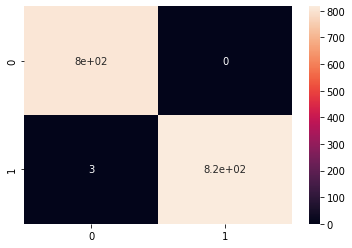

In [ ]:
m1 = 'XGBClassifier'
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=1)
xgb.fit(encoded_X_train, y_train)
y_pred = xgb.predict(encoded_X_test)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
sns.heatmap(dt_conf_matrix ,annot=True)
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

# **DecisionTreeClassifier**

confussion matrix
[[798   7]
 [  4 816]]


Accuracy of DecisionTreeClassifier: 99.32307692307693 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       805
           1       0.99      1.00      0.99       820

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



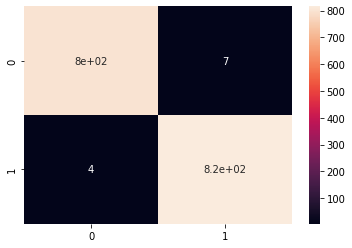

In [ ]:
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(encoded_X_train, y_train)
y_pred = dt.predict(encoded_X_test)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
sns.heatmap(dt_conf_matrix ,annot=True)
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

# **Random Forrest Model**

confussion matrix
[[765  40]
 [ 23 797]]


Accuracy of Random Forest: 96.12307692307692 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       805
           1       0.95      0.97      0.96       820

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



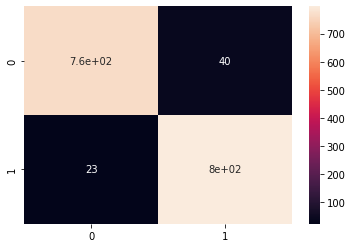

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(encoded_X_train,y_train)
rf_predicted = rf.predict(encoded_X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
sns.heatmap(rf_conf_matrix ,annot=True)
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))